<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers 

from keras.datasets import cifar10
from keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# MODIFY THE CODE TO ADD A VALIDATION SET

validation_images = train_images[40000:]
validation_labels = train_labels[40000:]

train_images = train_images[:40000]
train_labels = train_labels[:40000]


In [4]:
# CHECKER:

print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 1)
validation set: images (10000, 32, 32, 3)	labels: (10000, 1)
Test set: images (10000, 32, 32, 3)	labels: (10000, 1)


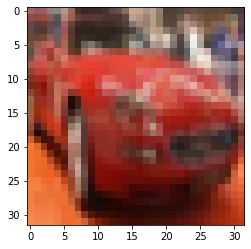

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
train_images = train_images.reshape((40000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = validation_images.reshape((10000, 32, 32, 3))
validation_images = validation_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

In [7]:
# CHECKER:

print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 10)
validation set: images (10000, 32, 32, 3)	labels: (10000, 10)
Test set: images (10000, 32, 32, 3)	labels: (10000, 10)


In [8]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
  
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), padding = 'same',  activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0

In [9]:
# MAKE WHATEVER CHANGES ARE NECESSARY
# TO GET 0.7 ACCURACY ON THE TEST SET

model_hist = model.fit(train_images, train_labels,
          epochs=100, batch_size=1024, validation_data= (validation_images, validation_labels),
          validation_freq = 5)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 162s 4ms/sample - loss: 2.2973 - accuracy: 0.1216
Epoch 2/100
40000/40000 [==============================] - 134s 3ms/sample - loss: 2.1488 - accuracy: 0.1901
Epoch 3/100
40000/40000 [==============================] - 109s 3ms/sample - loss: 2.0398 - accuracy: 0.2420
Epoch 4/100
40000/40000 [==============================] - 106s 3ms/sample - loss: 1.9438 - accuracy: 0.2899
Epoch 5/100
40000/40000 [==============================] - 110s 3ms/sample - loss: 1.8426 - accuracy: 0.3249 - val_loss: 1.9810 - val_accuracy: 0.2768
Epoch 6/100
40000/40000 [==============================] - 106s 3ms/sample - loss: 1.7717 - accuracy: 0.3530
Epoch 7/100
40000/40000 [==============================] - 107s 3ms/sample - loss: 1.7283 - accuracy: 0.3701
Epoch 8/100
40000/40000 [==============================] - 106s 3ms/sample - loss: 1.6501 - accuracy: 0.3936
Epoch 9/100
40000/40000 [===========

40000/40000 [==============================] - 111s 3ms/sample - loss: 0.9049 - accuracy: 0.6847 - val_loss: 0.8072 - val_accuracy: 0.7147
Epoch 71/100
40000/40000 [==============================] - 106s 3ms/sample - loss: 0.8666 - accuracy: 0.6988
Epoch 72/100
40000/40000 [==============================] - 105s 3ms/sample - loss: 0.8754 - accuracy: 0.6965
Epoch 73/100
40000/40000 [==============================] - 106s 3ms/sample - loss: 0.8670 - accuracy: 0.6978
Epoch 74/100
40000/40000 [==============================] - 106s 3ms/sample - loss: 0.8711 - accuracy: 0.6972
Epoch 75/100
40000/40000 [==============================] - 110s 3ms/sample - loss: 0.8638 - accuracy: 0.6987 - val_loss: 0.7994 - val_accuracy: 0.7223
Epoch 76/100
40000/40000 [==============================] - 106s 3ms/sample - loss: 0.8578 - accuracy: 0.7026
Epoch 77/100
40000/40000 [==============================] - 105s 3ms/sample - loss: 0.8589 - accuracy: 0.7039
Epoch 78/100
40000/40000 [=======================

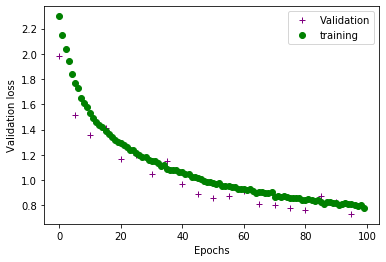

In [10]:
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

epochs_val = range(0, len(train_loss), 5)
epochs = range(0, len(train_loss))

plt.plot(epochs_val, val_loss, 'b+', label='Validation', c = 'purple')
plt.plot(epochs, train_loss, 'bo', label='training', c ='green')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, "test loss: ", test_loss)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc: 0.7369 test loss:  0.754617038154602


In [12]:
model.save_weights('./cifar10_dropout.h5', overwrite=True)